# Solutions 8 - Examples in Signal Decomposition

---

## Assignment 1

In [2]:
# Packages
using WAV
using SpecialMatrices
using LinearMaps
using Winston
using Interact

In [3]:
# Fast multiplication functions
import Base.*
function *{T}(C::Circulant{T},x::Vector{T})
    xt=fft(x)
    vt=fft(C.c)
    yt=vt.*xt
    real(ifft(yt))
end
function *{T}(A::Toeplitz{T},x::Vector{T})
    n=length(A.c)
    k=Int(round((n+1)/2))
    C=Circulant([A.c[k:n];A.c[1:k-1]])
    (C*[x;zeros(T,k-1)])[1:k]
end
function *{T}(A::Hankel{T},x::Vector{T})
    Toeplitz(A.c)*reverse(x)
end

* (generic function with 176 methods)

In [4]:
s, Fs = wavread("files/piano_A41.wav",100001);

In [6]:
wavplay(s,Fs)

In [5]:
function monocomponents(x::Array{Float64}, xx::Array{Float64}, Fs::Float32, k::Int64, d::Int64)
    # w is output from wavread(), package WAV, m is the number of samples we actually take
    # x=vec(s) where s is the output of wavread()
    # Fs is the output of wavread()
    # k (even) is the number of eigenpairs computed by eigs()
    # d is the level of recursion 
    # x=vec(s) where s is the output of wavread()
    # There is no grouping of repeating components! 
    println("d = ",d)
    if d<=2
        H=Hankel(x)
        n=size(H,1)
        xsimple=Array(Float64,2*n-1)
        # Fast Hankel EVD solver
        f(x)=H*x
        A=LinearMap(f,n,issym=true)
        λ,U=eigs(A, nev=k, which=:LM)
        # Significant threshold percentage test
        τ=0.1
        L=round(Int,(sum(abs(λ).>(τ*maxabs(λ)))/2))
        if L==1
            # Return the signal as monocomponent. 
            # The signal is reconstructed using only ONE element of the skew-diagonals
            xsimple=[(λ[1]*U[1,1])*U[:,1]; (λ[1]*U[n,1])*U[2:n,1]]
            xsimple+=[(λ[2]*U[1,2])*U[:,2]; (λ[2]*U[n,2])*U[2:n,2]]
            xx=[xx xsimple]
        else
            d+=1
            # Analyze the i-th component
            for i=1:L
                l1=2*i-1
                l2=2*i
                xsimple=[(λ[l1]*U[1,l1])*U[:,l1]; (λ[l1]*U[n,l1])*U[2:n,l1]]
                xsimple+=[(λ[l2]*U[1,l2])*U[:,l2]; (λ[l2]*U[n,l2])*U[2:n,l2]]
                # Recursion - we do not need more than 2*L eigenpairs
                xx=monocomponents(xsimple,xx, Fs,2*L,d)
            end
        end
    end
    xx
end

monocomponents (generic function with 1 method)

In [6]:
x=vec(s)
xx=x
k=40
xmono=monocomponents(x,xx,Fs,k,0)

d = 0
d = 1
d = 1
d = 2
d = 2
d = 3
d = 3
d = 1
d = 1
d = 2
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 1
d = 2
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 1
d = 2
d = 3
d = 3
d = 2
d = 2
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 1
d = 2
d = 2
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 1
d = 2
d = 3
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 3
d = 1
d = 1
d = 2
d = 2
d = 3
d = 3
d = 3
d = 2
d = 3
d = 3
d = 3
d = 1
d = 2
d = 2
d = 3
d = 3


100001x9 Array{Float64,2}:
 -0.0101321    0.16594     -0.0286502    …   0.0123591     0.000295601
 -0.0102542    0.187282     0.00178125       0.0133124     0.00424546 
 -0.0102542    0.207883     0.032182         0.01343       0.00759957 
 -0.0101321    0.227664     0.0620733        0.0127046     0.00988739 
 -0.00994903   0.246545     0.0909844        0.0111816     0.010788   
 -0.00964385   0.264452     0.11846      …   0.00895679    0.0101751  
 -0.00933866   0.281316     0.144067         0.00616982    0.00813481 
 -0.00909452   0.297069     0.167403         0.00299568    0.00495332 
 -0.00878933   0.311651     0.188101        -0.000366362   0.00107704 
 -0.00860622   0.325003     0.205834        -0.00370524   -0.0029502  
 -0.00842311   0.337073     0.220323     …  -0.00681135   -0.00656339 
 -0.00799585   0.347815     0.231341        -0.00948973   -0.00925566 
 -0.00720237   0.357185     0.238715        -0.0115723    -0.0106493  
  ⋮                                      ⋱        

We computed 8 mono-components (`xmono[:,1]` is the original signal).

Let us plot and listen to the mono-components. 

In [7]:
norm(x-xmono[:,1])

0.0

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"k",5,2:9,true)

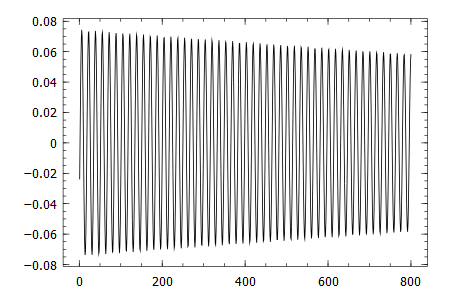

In [8]:
@manipulate for k=2:9
    plot(xmono[:,k][1:800])
end

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"k",5,2:9,true)

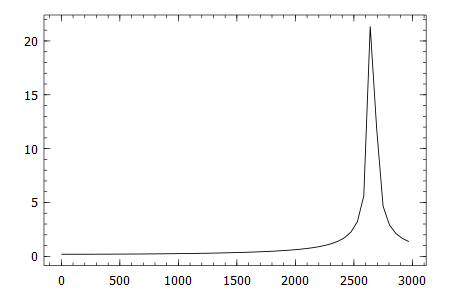

In [9]:
Fd=110
N=convert(Int32,ceil(Fs/Fd)) 
xx=collect(0:Fs/(2N):3000)
nn=length(xx)
@manipulate for k=2:9
    plot(xx,abs(fft(xmono[:,k][1:800]))[1:nn])
end

In [10]:
wavplay(xmono[:,1],Fs)

In [11]:
xx=sum(xmono,2)
wavplay(xx,Fs)

In [13]:
wavwrite(xx,"files/xx.wav",Fs=signal[2])

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::Function, ::Int64)
while loading In[13], in expression starting on line 1